<a href="https://colab.research.google.com/github/thefinancetutor/python-tutorial-colab/blob/main/Lecture_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Matrix Operations**

In [1]:
import numpy as np

We can use NumPy to multiply matrices.
A 1xN matrix is called a vector

In [11]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

In [3]:
a@b

32

In [14]:
b@a

32

In [12]:
np.outer(a, b)

array([[ 4,  5,  6],
       [ 8, 10, 12],
       [12, 15, 18]])

In [13]:
np.outer(b, a)

array([[ 4,  8, 12],
       [ 5, 10, 15],
       [ 6, 12, 18]])

In [17]:
c = np.array([[1, 2, 3], [3, 4, 5], [5, 6, 7]])
c

array([[1, 2, 3],
       [3, 4, 5],
       [5, 6, 7]])

In [18]:
c@a

array([14, 26, 38])

Why? $$1*1+2*2+3*3=14$$ $$3*1+4*2+5*3=26$$ $$5*1+6*2+7*3=38$$

In [21]:
m1 = np.array([[1, 3], [2, 4]])
m1

array([[1, 3],
       [2, 4]])

In [22]:
m2 = np.array([[0, 1], [3, 2]])
m2

array([[0, 1],
       [3, 2]])

In [23]:
m1@m2

array([[ 9,  7],
       [12, 10]])

Why? $$1*0+3*3=9$$ $$1*1+3*2=7$$ $$2*0+4*3=12$$ $$2*1+4*2=10$$

In [24]:
m3 = np.array([[2, 3, 1], [1, 4, 0]])
m4 = np.array([[1, 2], [0, 3], [2, 2]])
m5 = np.array([1, 1])
m3@m4@m5

array([19, 15])

**Portfolio Theory with Matrices**

In [27]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 6.4 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=048b8dfcf9596f53efa08d34bcee17d250a17940593a78008b9326bcb63158e3
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [29]:
import pandas as pd
import yfinance as yf
import datetime
from pandas_datareader import data as pdr

yf.pdr_override()
tickers=['TSLA','AMZN','C']

end = datetime.datetime.today()
start = end.replace(year = end.year - 2)

data = pdr.get_data_yahoo(tickers, start=start, end=end)['Adj Close'].resample('M').ffill().pct_change()


[*********************100%***********************]  3 of 3 completed


Let's calculate a variance for a portfolio of these three stocks

In [32]:
w = np.array([0.3, 0.3, 0.4])
var_p = 12*w@cov@w
std_p = np.sqrt(var_p)
std_p.round(4)

0.4658

Now let's write a function to calculate it

In [38]:
def portfolio_std(data, weights):
  cov = data.cov().to_numpy()
  w = np.array(weights)
  var_p = 12*w@cov@w
  std_p = np.sqrt(var_p).round(4)
  return std_p

In [39]:
portfolio_std(data,w)

0.4658

**Asset Pricing Models**

Pandas data reader does work with many other datasets besides Yahoo

In [46]:
import matplotlib.pyplot as plt
import pandas_datareader
pandas_datareader.famafrench.get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [58]:
start='1926-01-01'
ff=pandas_datareader.famafrench.FamaFrenchReader('F-F_Research_Data_Factors', freq='M', start=start).read()
ff

{0:          Mkt-RF   SMB   HML    RF
 Date                             
 1926-07    2.96 -2.30 -2.87  0.22
 1926-08    2.64 -1.40  4.19  0.25
 1926-09    0.36 -1.32  0.01  0.23
 1926-10   -3.24  0.04  0.51  0.32
 1926-11    2.53 -0.20 -0.35  0.31
 ...         ...   ...   ...   ...
 2021-02    2.78  2.11  7.08  0.00
 2021-03    3.08 -2.48  7.40  0.00
 2021-04    4.93 -3.09 -0.74  0.00
 2021-05    0.29 -0.21  7.04  0.00
 2021-06    2.79  1.79 -7.70  0.00
 
 [1140 rows x 4 columns], 1:       Mkt-RF    SMB    HML    RF
 Date                            
 1927   29.47  -2.46  -3.75  3.12
 1928   35.39   4.41  -5.83  3.56
 1929  -19.54 -30.78  11.96  4.75
 1930  -31.23  -5.19 -12.29  2.41
 1931  -45.11   3.51 -14.32  1.07
 ...      ...    ...    ...   ...
 2016   13.30   6.53  22.86  0.20
 2017   21.51  -4.95 -13.84  0.80
 2018   -6.93  -3.20  -9.34  1.81
 2019   28.28  -6.25 -10.68  2.14
 2020   23.67  13.07 -47.20  0.44
 
 [94 rows x 4 columns], 'DESCR': 'F-F Research Data Factors\n-------

In [59]:
ffac_df=ff[0]
ffac_df

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,2.96,-2.30,-2.87,0.22
1926-08,2.64,-1.40,4.19,0.25
1926-09,0.36,-1.32,0.01,0.23
1926-10,-3.24,0.04,0.51,0.32
1926-11,2.53,-0.20,-0.35,0.31
...,...,...,...,...
2021-02,2.78,2.11,7.08,0.00
2021-03,3.08,-2.48,7.40,0.00
2021-04,4.93,-3.09,-0.74,0.00


Let's plot the factors

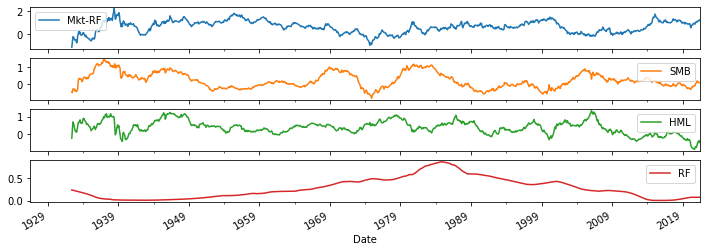

In [61]:
ffac_df.rolling(72).mean().plot(subplots=True, figsize=(12, 4))
plt.show()

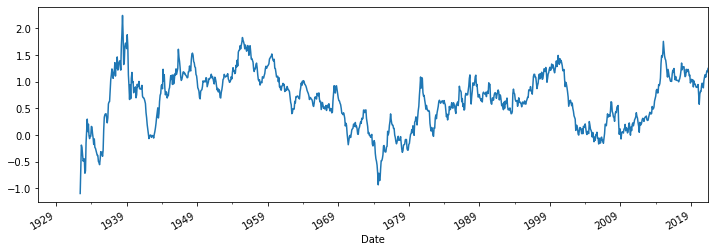

In [60]:
ffac_df['Mkt-RF'].rolling(72).mean().plot(subplots=True, figsize=(12, 4))
plt.show()

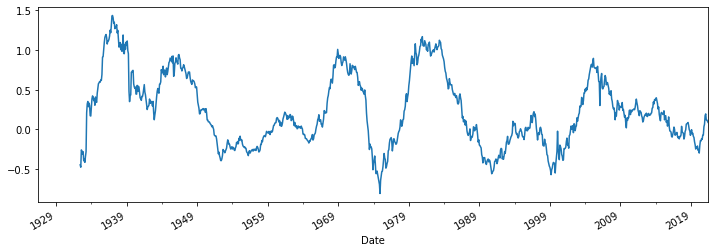

In [62]:
ffac_df['SMB'].rolling(72).mean().plot(subplots=True, figsize=(12, 4))
plt.show()

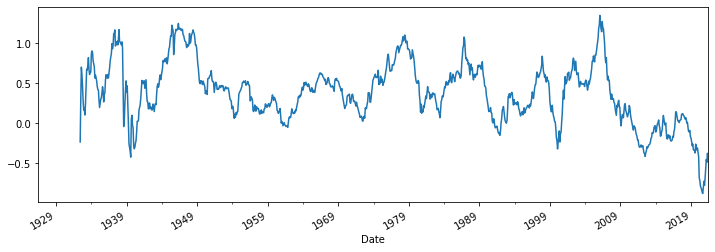

In [63]:
ffac_df['HML'].rolling(72).mean().plot(subplots=True, figsize=(12, 4))
plt.show()

Let's compute some statistics

In [64]:
ffac_df[['Mkt-RF', 'SMB', 'HML']].corr()

,Mkt-RF,SMB,HML
Mkt-RF,1.000000,0.322078,0.235568
SMB,0.322078,1.000000,0.126751
HML,0.235568,0.126751,1.000000


Let's add momentum

In [65]:
ffac_mom_df=pandas_datareader.famafrench.FamaFrenchReader('F-F_Momentum_Factor', freq='M', start=start).read()[0]
ffac_mom_df

,Mom
Date,
1927-01,0.44
1927-02,-1.32
1927-03,3.59
1927-04,4.17
1927-05,2.96
...,...
2021-02,-7.67
2021-03,-5.83
2021-04,1.01


Let's add the momentum factor to our dataset of Mkt-RF, SMB, and HML

In [67]:
df_ffac_merged = pd.merge(ffac_df,ffac_mom_df,how="inner",on='Date',sort=True,copy=True,indicator=False,validate='one_to_one')
df_ffac_merged

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
1927-01,-0.06,-0.56,4.83,0.25,0.44
1927-02,4.18,-0.10,3.17,0.26,-1.32
1927-03,0.13,-1.60,-2.67,0.30,3.59
1927-04,0.46,0.43,0.60,0.25,4.17
1927-05,5.44,1.41,4.93,0.30,2.96
...,...,...,...,...,...
2021-02,2.78,2.11,7.08,0.00,-7.67
2021-03,3.08,-2.48,7.40,0.00,-5.83
2021-04,4.93,-3.09,-0.74,0.00,1.01


Let's calculate factor exposures and idiosyncratic risk for a firm

In [77]:
tsla_data = pdr.get_data_yahoo('TSLA', start=start, end=end)['Adj Close'].resample('M').ffill()
tsla_df=tsla_data.to_frame()
tsla_df

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2010-06-30,4.766000
2010-07-31,3.988000
2010-08-31,3.896000
2010-09-30,4.082000
2010-10-31,4.368000
...,...
2021-04-30,709.440002
2021-05-31,625.219971
2021-06-30,679.700012


In [ ]:
tsla_df.rename('Adj_Close':)

In [73]:
df_tsla_ffac_merged = pd.merge(df_ffac_merged,tsla_data,how="inner",on='Date',sort=True,copy=True,indicator=False,validate='one_to_one')
df_ffac_merged

TypeError: ignored

Scikit-Learn is a more powerful package often used for ML applications, but is much less user-friendly

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(ret_df['SPY'],ret_df['AAPL'])
#reg = LinearRegression().fit(ret_df['SPY'].to_numpy().reshape(-1, 1),ret_df['AAPL'].to_numpy().reshape(-1, 1))

ValueError: ignored

Can we get resample the frequency at which we pull data? Yes.

In [ ]:
tickers = ['AAPL','MSFT','TSLA','SPY']
end = datetime.datetime.today() # Today's date
start = end.replace(year = end.year - 2) # Price history to two years ago from today

#initialize empty dataframes
ticker_df_m = pd.DataFrame()
output_df_m = pd.DataFrame()

for ticker in tickers:
    close_prices_m = yf.download(ticker,start=start, end=end,interval='1mo')['Adj Close']
    ticker_df_m[ticker] = close_prices_m.round(2)
    output_df_m = output_df_m.append(ticker_df_m)

output_df_m.dropna(0,inplace=True)
output_df_m

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,MSFT,TSLA,SPY
Date,,,,
2019-09-01,55.09,136.48,48.17,286.69
2019-10-01,61.19,140.74,62.98,294.38
2019-11-01,65.73,148.60,65.99,305.04
2019-12-01,72.44,155.33,83.67,312.37
2020-01-01,76.36,167.67,130.11,313.77
2020-02-01,67.44,159.57,133.60,288.93
2020-03-01,62.88,155.76,104.80,251.38
2020-04-01,72.65,177.00,156.38,284.96
2020-05-01,78.62,180.99,167.00,298.54


Remember how I said that Pandas datareader is broken?

yfinance can fix it

In [ ]:
yf.pdr_override()

data = pdr.get_data_yahoo(tickers, start=start, end=end)['Adj Close'].resample('M').ffill()
data

[*********************100%***********************]  4 of 4 completed


,AAPL,MSFT,SPY,TSLA
Date,,,,
2019-08-31,51.342091,135.327377,282.518219,45.122002
2019-09-30,55.088093,136.475876,288.015442,48.174000
2019-10-31,61.185486,140.736130,294.381989,62.984001
2019-11-30,65.930664,149.104645,305.038055,65.987999
2019-12-31,72.443558,155.329636,313.901062,83.666000
2020-01-31,76.356224,167.671310,313.774353,130.113998
2020-02-29,67.598061,160.010727,288.934174,133.598007
2020-03-31,62.882320,155.763794,252.854584,104.800003
2020-04-30,72.652580,176.998489,284.962952,156.376007


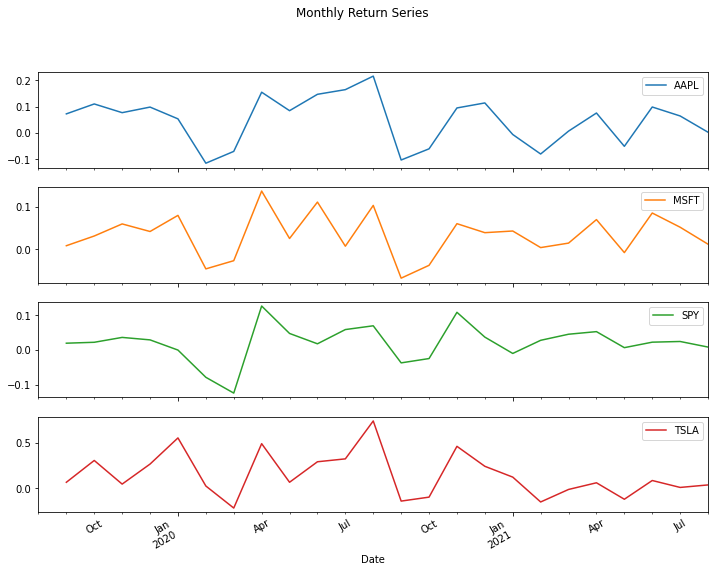

In [ ]:
ret_df_m=data.pct_change()
ret_df_m.plot(figsize = (12, 9), subplots = True, title = 'Monthly Return Series')
plt.show()